# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

_Given the questions listed below, we are to explore domain data of E-news Express and perform a statistical analysis to determine the effectiveness of the news portal's new landing page in gathering new subscribers for the news portal._

- _Do the users spend more time on the new landing page than on the existing landing page?_

- _Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?_

- _Does the converted status depend on the preferred language?_

- _Is the time spent on the new page the same for the different language users?_

## Import all the necessary libraries

In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
import scipy
scipy.__version__

'1.7.3'

## Reading the Data into a DataFrame

In [7]:
df = pd.read_csv('/Users/dante/OneDrive/UT McCombs - PGP-DSBA/M2_Wk 5 PROJECT 2/abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

___Displaying the first few rows of the dataset___

In [8]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


___Displaying the last few rows of the dataset___

In [9]:
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


___Displaying the shape of the dataset___

In [10]:
df.shape

(100, 6)

___Checking the data types of the columns for the dataset___

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


___Getting the statistical summary for the numerical variables___

In [26]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,100.0,NaN,NaN,NaN,546517.0,52.295779,546443.0,546467.75,546492.5,546567.25,546592.0
group,100,2,control,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
landing_page,100,2,old,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_spent_on_the_page,100.0,NaN,NaN,NaN,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71
converted,100,2,yes,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language_preferred,100,3,Spanish,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df['time_spent_on_the_page'].min()

0.19

In [30]:
df['time_spent_on_the_page'].mean()

5.377800000000002

In [31]:
df['time_spent_on_the_page'].max()

10.71

___Getting the statistical summary for the categorical variables___

In [33]:
# list of all categorical object variable types
cat_cols = ['group', 'landing_page', 'converted', 'language_preferred']

for column in cat_cols:
    print(df[column].value_counts())
    print("-" * 50)

control      50
treatment    50
Name: group, dtype: int64
--------------------------------------------------
old    50
new    50
Name: landing_page, dtype: int64
--------------------------------------------------
yes    54
no     46
Name: converted, dtype: int64
--------------------------------------------------
Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64
--------------------------------------------------


___Checking for Missing Values___

In [62]:
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

___Checking for Duplicates___

In [63]:
df.duplicated().sum()

0

#### ___Observations:___
- _Dataset has 100 rows and 6 columns._
- _All 6 columns have 100 observations. None appear to be missing values or duplicated._
- _There are variables of different types (int, float, object) in the data._
- _The following are object type columns: group, landing_page, converted, language_preferred._
- _We might assume that the values under the column "time_spent_on_the_page" is in minutes._
- _Minimum time for time spent on the page is __0.19__ minute._
- _Average time for time spent on the page is __5.38__ minutes._
- _Maximum time for time spent on the page is __10.71__ minutes._



### Univariate Analysis

___Time spent on the page___

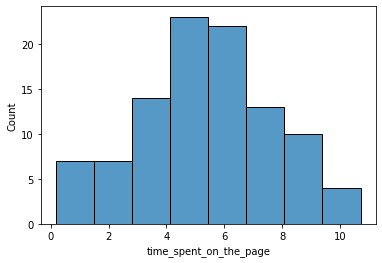

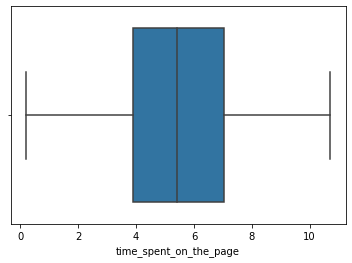

In [61]:
sns.histplot(data=df,x='time_spent_on_the_page')
plt.show()
sns.boxplot(data=df,x='time_spent_on_the_page')
plt.show()

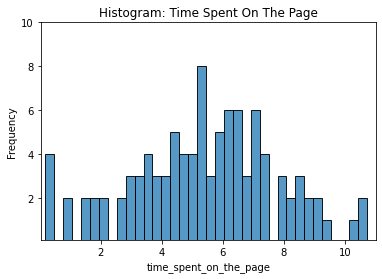

In [74]:
# Spreading the data for a closer look at Time Spent On The Page.

plt.title('Histogram: Time Spent On The Page')
plt.xlim(0.05,11)
plt.ylim(0.10,10)
plt.xlabel('time_spent_on_the_page')
plt.ylabel('Frequency')
sns.histplot(data=df, x='time_spent_on_the_page', bins=36);

___Group___

In [66]:
# Quantity of variables under column, "group"
df['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

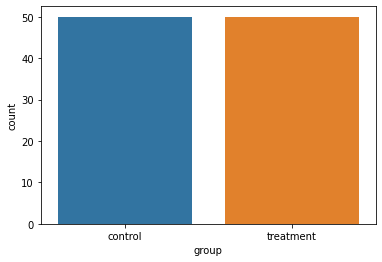

In [72]:
# code to plot the countplot for column, "group"
sns.countplot(data=df,x='group')
plt.show()


___Landing Page___

In [75]:
# Quantity of variables under column, "landing-page"
df['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

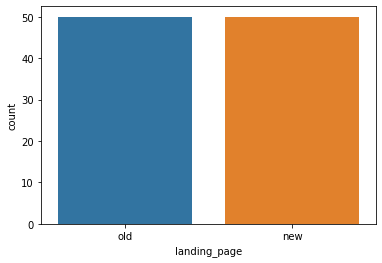

In [76]:
# code to plot the countplot for column, "landing_page"
sns.countplot(data=df,x='landing_page')
plt.show()

___Converted___

In [77]:
# Quantity of varibles under the column, "converted"
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

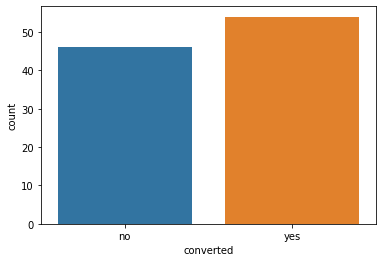

In [71]:
# code to plot the countplot for column, "converted"
sns.countplot(data=df,x='converted')
plt.show()

___Language Preferred___

In [78]:
# Quantity of variables under the column, "language_preferred"
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

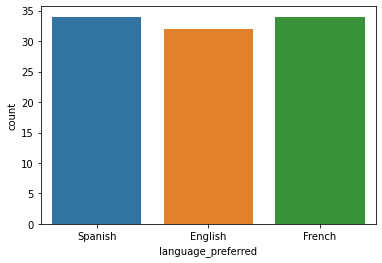

In [79]:
# code to plot the countplot for column, "language_preferred"
sns.countplot(data=df,x='language_preferred')
plt.show()

### Bivariate Analysis

___Landing page vs Time spent on the page___

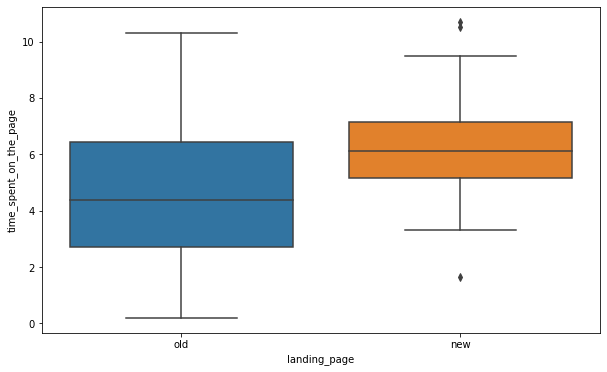

In [83]:
# relationship between 'time_spent_on_the_page' and 'landing_page' columns
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page')
plt.show()

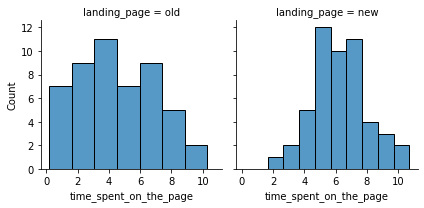

In [89]:
g = sns.FacetGrid(df, col='landing_page')
g.map(sns.histplot, 'time_spent_on_the_page');

___Conversion status vs Time spent on the page___

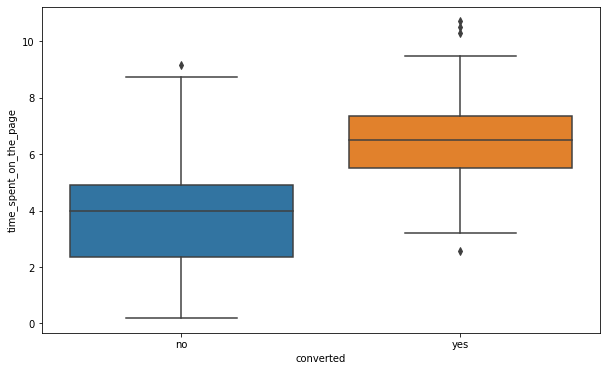

In [82]:
# relationship between 'time_spent_on_the_page' and 'converted' columns
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='converted',y='time_spent_on_the_page')
plt.show()

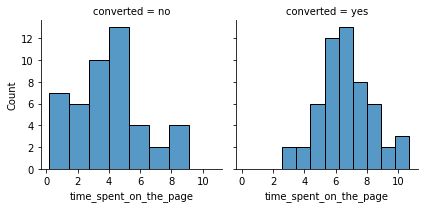

In [87]:
g = sns.FacetGrid(df, col='converted')
g.map(sns.histplot, 'time_spent_on_the_page');

___Language preferred vs Time spent on the page___

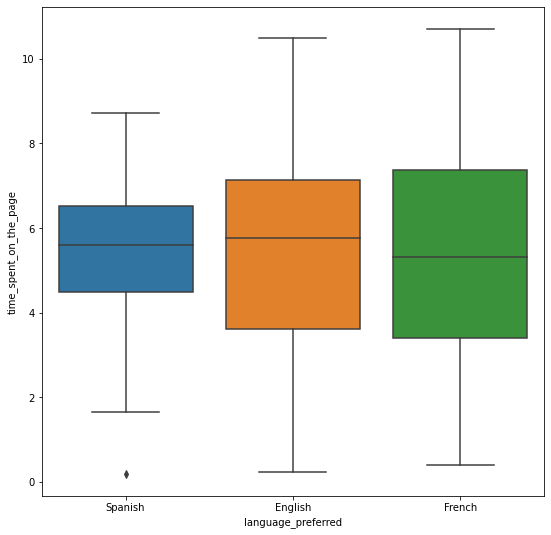

In [85]:
# distribution of 'time_spent_on_the_page' among the 'language_preferred'
plt.figure(figsize=(9, 9))
sns.boxplot(data = df, x = 'language_preferred', y = 'time_spent_on_the_page')
plt.show()

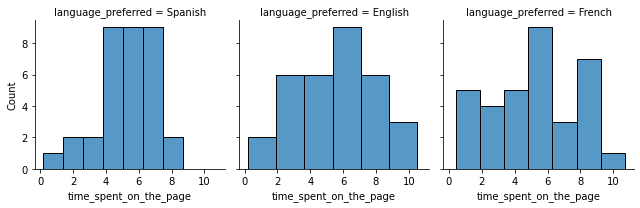

In [88]:
g = sns.FacetGrid(df, col='language_preferred')
g.map(sns.histplot, 'time_spent_on_the_page');

#### _Observation on the above subplots:_
- _A striking observation is the similarity between the time spent on the page with the control group and treatment groups and the time spent on the page with the old versus new landing page. The graph for these two separate subplots are very similar._

## 1. Do the users spend more time on the new landing page than the existing landing page? 

### Perform Visual Analysis

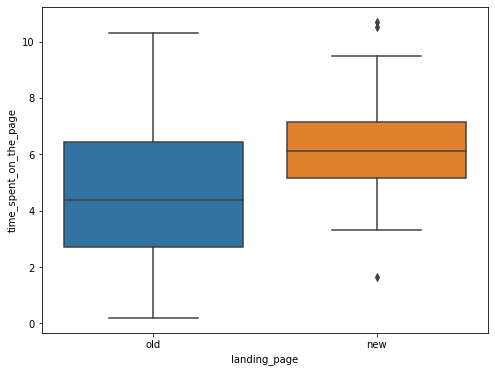

In [86]:
# visual analysis of the time spent on the new page and the time spent on the old page
plt.figure(figsize=(8,6))
sns.boxplot(x = 'landing_page', y = 'time_spent_on_the_page', data = df)
plt.show()


- _An initial observation from this visual analysis is that a concentration of users spend more time on the new landing page between 5 to 7 minutes than what we see of the larger population of concentrated users on the existing landing page between 3 to (just over) 6 minutes._


### Step 1: Define the null and alternate hypotheses

The null and alternative hypotheses can be formulated as:

> $H_0:$ The mean time of new landing page users is equal to that from the old landing page users. <br>
$H_a:$ The mean time of new landing page users is greater than that from the old landing page users.

Let $\mu_1$ and $\mu_2$ be the mean time from the new landing page and the mean time from the old landing page respectively.

The above formulated hypotheses can be written as:

> $H_0: \mu_1 = \mu_2 $ <br>
$H_a: \mu_1 > \mu_2 $

### Step 2: Select Appropriate test

**Two-sample Independent t-test**

_This is a one-tailed test and we are comparing the sample means from two independent populations when the standard deviations are unknown. We are therefore selecting the use of the two-sample independent t-test._

### Step 3: Decide the significance level

As given in the problem statement, we select 𝛼=0.05

### Step 4: Collect and prepare data

In [95]:
# subset data frame for new landing page users 
time_spent_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']

# subset data frame for old landing page users
time_spent_old = df[df['landing_page'] == 'old']['time_spent_on_the_page'] 

In [96]:
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_new.std(),2))
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_old.std(),2))

The sample standard deviation of the time spent on the new page is: 1.82
The sample standard deviation of the time spent on the new page is: 2.58


### Step 5: Calculate the p-value

- _We will use the `ttest_ind` function from the `scipy.stats` library to perform a two-sample independent t-test._

In [97]:
# import the required function
from scipy.stats import ttest_ind

# we then calculate the p-value
test_stat, p_value =  ttest_ind(time_spent_new, time_spent_old, equal_var = False, alternative = 'greater')

print('The p-value is', p_value)

The p-value is 0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [98]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

_As the p-value(~0.00139) is less than the level of significance, we reject the null hypothesis. Hence, we have enough significance to conclude that users spend more time on the new landing page than the existing landing page._

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis

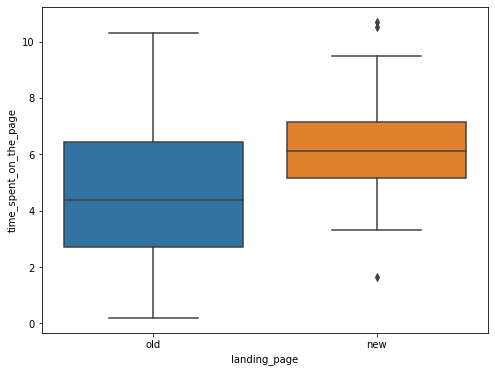

In [100]:
# visual analysis of the time spent on the new page and the time spent on the old page
plt.figure(figsize=(8,6))
sns.boxplot(x = 'landing_page', y = 'time_spent_on_the_page', data = df)
plt.show()

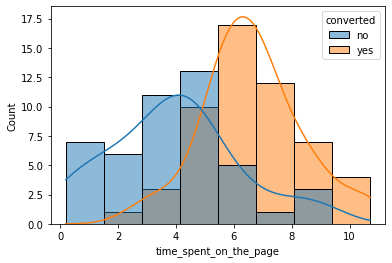

In [106]:
# additional visual analysis of the time spent on the new page and the time spent on the old page
sns.histplot(data=df, x='time_spent_on_the_page', hue='converted', kde=True);

### Step 1. Define the null and alternate hypotheses


The null and alternative hypotheses can be formulated as:

> $H_0:$ The conversion rate of users for the new page is equal to the conversion rate of the old page. <br>
$H_a:$ The conversion rate of users for the new page greater the conversion rate of the old page

Let $\mu_1$ and $\mu_2$ be the mean time from the new landing page and the mean time from the old landing page respectively.

The above formulated hypotheses can be written as:

> $H_0: \mu_1 = \mu_2 $ <br>
$H_a: \mu_1 > \mu_2 $

### Step 2: Select appropriate test

**Two-sample Independent t-test**

_This is a one-tailed test concerning two population proportions from two independent populations. We are therefore using the two-sample independent t-test._ 

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [110]:
# calculate the number of converted users in the treatment group
new_converted = df[df['group'] == 'treatment']['converted'].value_counts()['yes']
# calculate the number of converted users in the control group
old_converted = df[df['group'] == 'control']['converted'].value_counts()['yes']

n_control = df.group.value_counts()['control'] # total number of users in the control group
n_treatment = df.group.value_counts()['treatment'] # total number of users in the treatment group

print('The numbers of users served the new and old pages are {0} and {1} respectively'.format(n_control, n_treatment ))

The numbers of users served the new and old pages are 50 and 50 respectively


### Step 5: Calculate the p-value

In [113]:
# import the required function
from scipy.stats import ttest_ind 

# calculate the p-value
test_stat, p_value = ttest_ind(time_spent_new, time_spent_old, equal_var = False, alternative = 'greater')  #complete the code by filling appropriate parameters in the blanks

print('The p-value is', p_value)

The p-value is 0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [114]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### Step 7: Draw inference

_As the p-value(~0.000139) is less than the level of significance, we reject the null hypothesis. Hence, we have enough significance to conclude that the conversion rate for the new page is greater than the conversion rate for the old page._

## 3. Is the conversion and preferred language are independent or related?

### Perform the Visual Analysis

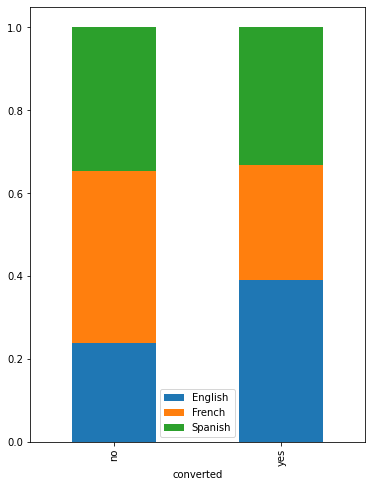

In [116]:
# complete the code to visually plot the dependency between conversion status and preferred langauge
pd.crosstab(df['converted'],df['language_preferred'],normalize='index').plot(kind="bar", figsize=(6,8), stacked=True)
plt.legend()
plt.show()

### Step 1: Define the null and alternate hypotheses


We will test the following null hypothesis:

>$H_0:$ Converted status is independent of preferred language.

against the alternate hypothesis

>$H_a:$ Converted status depends on preferred language.

### Step 2: Select Appropriate test

**Chi-Square Test for Independence**

_This is a problem of the test of independence, concerning two categorical variables - converted status and preferred language. We will therefore select the Chi-Square Test for Independence._

### Step 3: Decide the significance level

_As given in the problem statement, we select α = 0.05._

### Step 4: Collect and prepare data

In [119]:
# This is a contingency table showing the distribution of the two categorical variables
contingency_table = pd.crosstab(df['converted'], df['language_preferred'])  

contingency_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


### Step 5: Calculate the p-value

In [120]:
# import the required function
from scipy.stats import chi2_contingency 

# calculate the p-value
chi2, p_value, dof, exp_freq = chi2_contingency(contingency_table)
print('The p-value is', p_value)

The p-value is 0.21298887487543447


### Step 6: Compare the p-value with $\alpha$

In [121]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

_As the p-value is much greater than the significance level, we fail to reject the null hypothesis. We conclude that converted status is indpenendent of preferred language at 5% significance level._

## 4. Is the time spent on the new page same for the different language users?

### Perform Visual Analysis

In [125]:
# DataFrame for users who got served the new page
df_new = df[df['landing_page'] == 'new']

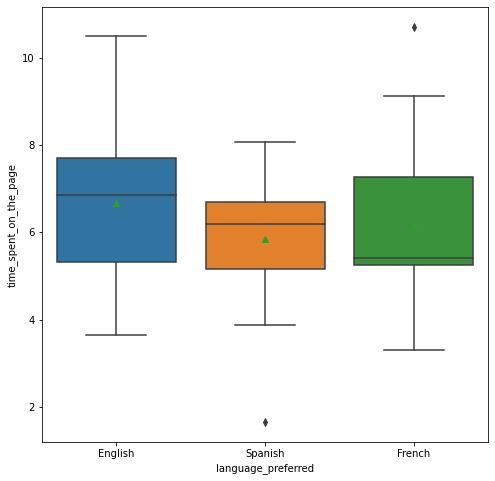

In [126]:
# visual plot of the time spent on the new page for different language users
plt.figure(figsize=(8,8))
sns.boxplot(x = 'language_preferred', y = 'time_spent_on_the_page', showmeans = True, data = df_new)
plt.show()

In [127]:
# mean time spent on the new page for different language users
df_new.groupby(['language_preferred'])['time_spent_on_the_page'].mean()

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

### Step 1: Define the null and alternate hypotheses

Let $\mu_1, \mu_2, \mu_3$ be the means of the time spent on the new page for each language English, French, Spanish respectively.

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: $ At least one of the preferred language is different in mean time spent on the new page from the rest.

### Step 2: Select Appropriate test

**One-way ANOVA Test**

_This is a problem, concerning three population means. We assume the populations are normally distributed, the samples are independent simple random samples, and the population variances are equal. Therefore, we select using the One-way ANOVA test._

### Step 3: Decide the significance level

_As given in the problem statement, we select α = 0.05._

### Step 4: Collect and prepare data

In [148]:
# Subset data frame of the time spent on the new page by English language users 
time_spent_English = df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page']
# create subsetted data frames of the time spent on the new page by French and Spanish language users
time_spent_French = df_new[df_new['language_preferred']=='French']['time_spent_on_the_page']
time_spent_Spanish = df_new[df_new['language_preferred']=='Spanish']['time_spent_on_the_page']

### Step 5: Calculate the p-value

Now, the normality and equality of variance assumptions need to be checked. 

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

### _Let's first start with the Shapiro-Wilk's test_
We will test the following null hypothesis:

>$H_0:$ Preferred language follows a normal distribution against

the alternative hypothesis:

>$H_a:$ Preferred language does not follow a normal distribution

In [149]:
# Assumption 1: Normality
# import the required function
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(df_new['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


_Since p-value of the test is very large, we fail to reject the null hypothesis that the response follows the normal distribution._

### _We then use the Levene test_


We will test the null hypothesis:

>$H_0$: All the population variances are equal

against the alternative hypothesis:

>$H_a$: At least one variance is different from the rest

In [150]:
# import the required function
from scipy.stats import levene 

# write the code to calculate the p-value
test_stat, p_value = levene(time_spent_English, time_spent_French, time_spent_Spanish)

print('The p-value is', p_value)

The p-value is 0.46711357711340173


_The p-value is still large using Levene's test so again, we fail to reject the null hypothesis of homogeneity of variances._

### Let's test whether the assumptions are satisfied or not


* The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.
* Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
* Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.

_Let's find the p-value_

In [151]:
#import the required function
# complete the code to import the required function
from scipy.stats import f_oneway

# write the code to calculate the p-value
test_stat, p_value = f_oneway(time_spent_English, time_spent_French, time_spent_Spanish) 

print('The p-value is', p_value)

The p-value is 0.43204138694325955


### Step 6: Compare the p-value with  $\alpha$

In [152]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7: Draw inference

_As the p-value is greater than the level of significance. We therefore fail to reject the null hypothesis. So, we do not have enough statistical significance to conclude that at least one of the preferred language is any different in mean time spent on the new page when compared to the other languages._

## Conclusion and Business Recommendations

_* Observations from the sample data show that overall, users spend more time on the new landing page compared to the old landing page._

_* Of the control group using the old page, users spent __4.55__ minutes, while the experimented treatment group spent __6.22__ minutes on the new landing page._

_* It was found from the sample data that  __66%__, (or 33 of 50) users who spent time on the new page converted to a subscription, while __42%__ (or 21 of 50) users converted to a subscription using the old page. So, the conversion rate for the new page is greater than the old page._

_* The sample data shows that the converted status is indpenendent of preferred language at 5% significance level._

_* Based on the sample data, there is not enough statistical evidence to support significant difference in time spent on the new landing page by users of any of the three language versions (English, French, or Spanish). In other words, the time spent on the new page is actually the same for the different language users._


_* One recommendation is to obtain further data of user interaction specifically within the landing page to determine which interactive elements (audio, graphics, video, etc.) were significantly influential in keeping users longer on the new landing page._


_* Aggregation of data for a specic periods during the week such as weekdays versus weekends may also provide more clarity on the performance of the new landing page. We could further explore what interactive elements and content type keep users on the landing page longer as well as features that convert users to subscribers._

___